# Выбор нового района для нефтедобычи

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Функция-расчета-прибыли:" data-toc-modified-id="Функция-расчета-прибыли:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Функция расчета прибыли:</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Рассчет-прибыли-и-рисков-для-каждого-региона" data-toc-modified-id="Рассчет-прибыли-и-рисков-для-каждого-региона-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Рассчет прибыли и рисков для каждого региона</a></span><ul class="toc-item"><li><span><a href="#Применение-техники-бутстрап-для-расчета-распределения-прибыли-на-случайных-выборках" data-toc-modified-id="Применение-техники-бутстрап-для-расчета-распределения-прибыли-на-случайных-выборках-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Применение техники бутстрап для расчета распределения прибыли на случайных выборках</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Добавим-в-сводную-таблицу--среднюю-прибыль,-95-%-доверительный-интервал-и-риск-убытков-для-каждого-региона:" data-toc-modified-id="Добавим-в-сводную-таблицу--среднюю-прибыль,-95-%-доверительный-интервал-и-риск-убытков-для-каждого-региона:-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Добавим в сводную таблицу  среднюю прибыль, 95 % доверительный интервал и риск убытков для каждого региона:</a></span><ul class="toc-item"><li><span><a href="#Добавим-в-таблицу-среднюю-предполагаемую-прибыль-по-регионам:" data-toc-modified-id="Добавим-в-таблицу-среднюю-предполагаемую-прибыль-по-регионам:-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Добавим в таблицу среднюю предполагаемую прибыль по регионам:</a></span></li><li><span><a href="#Добавим-в-таблицу-95-процентный-доверительный-интервал:" data-toc-modified-id="Добавим-в-таблицу-95-процентный-доверительный-интервал:-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Добавим в таблицу 95 процентный доверительный интервал:</a></span></li><li><span><a href="#Добавим-в-таблицу-риск-убытков-для-каждого-региона:" data-toc-modified-id="Добавим-в-таблицу-риск-убытков-для-каждого-региона:-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Добавим в таблицу риск убытков для каждого региона:</a></span></li></ul></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

## Загрузка и подготовка данных

По правилам хорошего тона для удобства чтения и написания проекта, в первой ячейке загрузим все необходимые нам бибилиотеки и модули. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from numpy.random import RandomState
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

Загрузим и изучим данные, оценим необходимость работы с пропусками, перевода данных в другие типы и прочих улушений:

In [2]:
data1 = pd.read_csv('/datasets/geo_data_0.csv')
data2 = pd.read_csv('/datasets/geo_data_1.csv')
data3 = pd.read_csv('/datasets/geo_data_2.csv')

data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
data2.info()
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [4]:
data3.info()
data3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Удалим столбец с уникальным идентификатором во всех трех датасетах, для того чтобы модель не учитывала их при обучении: 

In [5]:
data1 = data1.drop('id', axis=1)
data2 = data2.drop('id', axis=1)
data3 = data3.drop('id', axis=1)

### Вывод: 
Необходимости заполнять пропуски нет, столбцы имеют адекватные названия. Для текущей задачи данные уже готовы. Мы последовательно создали три датасета для кажого региона соответственно. Удалили столбец для id, для того чтобы модель обучалась только на числовых данных. Можно переходить к разбиению на выборки и обучение модели. 

## Обучение и проверка модели

Выделим среди данных признаки и целевой признак для этого разделим датасеты на определяющие признаки и целевой признак:

In [6]:
target1 = data1['product']
features1 = data1.drop('product', axis=1)
target2 = data2['product']
features2 = data2.drop('product', axis=1)
target3 = data3['product']
features3 = data3.drop('product', axis=1)

Разобьем данные на обучающую и валидационную выборки в пропорции 75:25, для начала определим значение random_state: 

In [7]:
state = np.random.RandomState(12345)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features1, target1, test_size=0.25, 
    random_state=state)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features2, target2, test_size=0.25, 
    random_state=state)

features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(
    features3, target3, test_size=0.25, 
    random_state=state)

Проведем масштабирование определяющих признаков для улучшения работы модели, для упрощения задачи применим функцию: 

In [8]:
def standard(features_train, features_valid):

    numeric = ['f0', 'f1', 'f2']

    scaler = StandardScaler()
    scaler.fit(features_train[numeric])

    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    return features_train, features_valid

features_train_1, features_valid_1 = standard(features_train_1, features_valid_1)
features_train_2, features_valid_2 = standard(features_train_2, features_valid_2)
features_train_3, features_valid_3 = standard(features_train_3, features_valid_3)

Обучим модель логистической регрессии на обучающей выборке: 

In [9]:
model1 = LinearRegression(
    fit_intercept=True, normalize=False,
    copy_X=True, n_jobs=None)

model2 = LinearRegression(
    fit_intercept=True, normalize=False,
    copy_X=True, n_jobs=None)

model3 = LinearRegression(
    fit_intercept=True, normalize=False,
    copy_X=True, n_jobs=None)

model1.fit(features_train_1, target_train_1)
model2.fit(features_train_2, target_train_2)
model3.fit(features_train_3, target_train_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Сохраним предсказания на валидационной выборке в переменные для каждого района, правильные ответы сохранены у нас в переменных target_valid_1, target_valid_2, target_valid_3: 

In [10]:
predicted_1 = pd.Series(model1.predict(features_valid_1))
predicted_2 = pd.Series(model2.predict(features_valid_2))
predicted_3 = pd.Series(model3.predict(features_valid_3))


Выведем на экран средний запас сырья предсказанного моделью, а также значения метрики RMSE для модели: 

In [11]:
region_data = [[1, predicted_1.mean().round(2), target_valid_1.mean().round(2),
                ((mean_squared_error(target_valid_1, predicted_1)) ** 0.5).round(2)],
               [2, predicted_2.mean().round(2), target_valid_2.mean().round(2), 
                ((mean_squared_error(target_valid_2, predicted_2)) ** 0.5).round(2)],
               [3, predicted_3.mean().round(2), target_valid_3.mean().round(2),
                ((mean_squared_error(target_valid_3, predicted_3)) ** 0.5).round(2)]]

region_data = pd.DataFrame(region_data)
region_data.columns = ['Регион добычи', 'Средние реальные запасы сырья, тыс. барр.',
                       'Средние предсказанные запасы сырья,тыс. барр.', 'RMSE']
region_data

,Регион добычи,"Средние реальные запасы сырья, тыс. барр.","Средние предсказанные запасы сырья,тыс. барр.",RMSE
0,1,92.59,92.08,37.58
1,2,68.77,68.77,0.89
2,3,95.09,94.75,39.96


### Вывод: 
Мы провели обучение моделей, сохранили предсказания моделей и вычислили метрику RMSE для каждого региона добычи. Наибольшее среднее как предсказанных, так и реальных запасов находится в третьем регионе добычи. Для этого же региона модель показала наибольшее значение метрики RMSE. На втором месте по предсказанным запасам, находится 1 регион добычи, значение метрики RMSE для этого региона тоже занимает почетное 2 место, на почти на 20 баррелей в среднем отстает от двух лидеров 2 регион добычи, однако нужно отметить, что RMSE данного региона менее 1 тысячи баррелей. Модель показала поразительную точность в предсказании. 

## Подготовка к расчёту прибыли

Для того, чтобы рассчитать объем безубыточности разработки одной скважины нужно разделить на 200 точек суммарный бюджет для региона равный 10 млрд. рублей. 

In [12]:
region_budget = 10000000000
set_borehole = 200
one_thousand_profit = 450000
one_borehole_sales = round(region_budget / set_borehole) / 1000000
print('Сумма прибыли для безубыточной разработки одной скважины:', one_borehole_sales, 'млн. рублей')

Сумма прибыли для безубыточной разработки одной скважины: 50.0 млн. рублей


Как мы видим, прибыль для безубыточности разработки одной скважины равна 50 000 000 рублей. Теперь мы можем посчитать необходимый объем запасов в одной скважине для безубыточной ее  разработки, для этого необходимо сумму безубыточности одной скважины разделить на цену одной тысячи баррелей(равна 450000 рублей): 

In [13]:
one_borehole_stock = one_borehole_sales / one_thousand_profit
one_borehole_stock = round(one_borehole_stock, 2)
print('Запас сырья в скважине для ее безубыточной разработки:', one_borehole_stock, 'тысяч баррелей')

Запас сырья в скважине для ее безубыточной разработки: 0.0 тысяч баррелей


Сравним полученный запас сырья со средним объемом предсказанных и реальных запасов:

In [14]:
region_data['Разница среднего запаса региона и безубыточного запаса, тыс. барр.'] = (
    region_data['Средние реальные запасы сырья, тыс. барр.'] - one_borehole_stock 
).round(2)
region_data

,Регион добычи,"Средние реальные запасы сырья, тыс. барр.","Средние предсказанные запасы сырья,тыс. барр.",RMSE,"Разница среднего запаса региона и безубыточного запаса, тыс. барр."
0,1,92.59,92.08,37.58,92.59
1,2,68.77,68.77,0.89,68.77
2,3,95.09,94.75,39.96,95.09


### Вывод: 

Мы сохранили в отдельных переменных все величины, необходимые нам для расчетов прибыли. Также мы рассчитали бюджет на разработку одной скважины, а также необходимый минимальный запас сырья для ее безубыточной разработки. Как видно из приведенной выше таблицы, средние запасы сырья в регионах разработки отличаются от минимальных запасов сырья для безубыточной разработки. Разница составляет от 16 до 42 тысяч баррелей.

## Расчёт прибыли и рисков 

### Функция расчета прибыли: 

Для начала напишем функцию для рассчета прибыли региона: 

In [15]:
def profit_region(target, predicted, count):
    # Cортируем предсказания по убыванию запасов
    sort_predict = predicted.sort_values(ascending=False)
    # Выбираем скважины из целевого признака по индексам отсортированных предсказаний
    # задаем количество пременной count
    select_target = target[sort_predict.index][:count]
    # Рассчитываем прибыль от разработки заданного количества реальных скважин
    profit_region = ((select_target.sum() * one_thousand_profit) - region_budget) / 1000000
           
    return profit_region.round(2)


Затем напишем фукнцию для расчета прибыли для полученного ранее ТОПа скважин в регионе: 

In [16]:
target_valid_1 = target_valid_1.reset_index(drop=True)
target_valid_2 = target_valid_2.reset_index(drop=True)
target_valid_3 = target_valid_3.reset_index(drop=True)
profit_region_1 = profit_region(target_valid_1, predicted_1, 199)
profit_region_2 = profit_region(target_valid_2, predicted_2, 199)
profit_region_3 = profit_region(target_valid_3, predicted_3, 199)

region_data['Реальная прибыль, млн. руб.'] = pd.Series(
    [profit_region_1, profit_region_2, profit_region_3]).astype('float')
region_data

,Регион добычи,"Средние реальные запасы сырья, тыс. барр.","Средние предсказанные запасы сырья,тыс. барр.",RMSE,"Разница среднего запаса региона и безубыточного запаса, тыс. барр.","Реальная прибыль, млн. руб."
0,1,92.59,92.08,37.58,92.59,3266.88
1,2,68.77,68.77,0.89,68.77,2353.01
2,3,95.09,94.75,39.96,95.09,2476.40


#### Вывод:
При выборе 200 скважин с максимальным запасом, и вычислении предполагаемой рибыли, мы получили профит равный от 2,5 до 4 млрд. рублей. Теперь мы готовы произвести расчет доверительного интервала, рисков и распределния прибыли в соответствии с техникой бутстрап. 

## Рассчет прибыли и рисков для каждого региона

### Применение техники бутстрап для расчета распределения прибыли на случайных выборках

Применим технику бутсрап, создадим 1000 случайных выборок для расчета распределения прибыли. При этом мы будем брать 500 случайных скважин, из которых возьмем ТОП-200 по запасам сырья и рассчитаем прибыль для данной выборки. Так как у нас три региона то, для расчета прибыли для каждого региона стоит создать функцию: 

In [17]:
def bootstrap(target, predictions):
    
    bootstrap_samples = 1000 # количество выборок для бутстрапа
    # Создаем пустый список для прибыли региона
    profit_reg = []
    count = 0 # счетчик скважин с отрицательной прибылью
    # Сбросим индекс для целевого признака, чтобы он соответствовал предсказанию
    target = target.reset_index(drop=True) 
        
    for i in range(bootstrap_samples):
        # Создаем подвыборку из целевого признака 500 случайных скважин для разработки
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        # По индексу этой выборки выбираем скважины с предсказанным объемом
        probs_subsample = predictions[target_subsample.index]
        # Выбираем 200 лучших скважин и считаем для них прибыль
        profit_top = profit_region(target_subsample, probs_subsample, 199)
        
        if profit_top < 0:
            count += 1
        
        profit_reg.append(profit_top)
        
    # Переводим в Series список profit_reg         
    profit_reg = pd.DataFrame(profit_reg)
    # Рассчитаем 95 % доверительный интервал 
    # Вычислим 2,5 % квантиль
    lower = profit_reg.quantile(0.025) 
    # Вычислим 97,5 % квантиль
    upper = profit_reg.quantile(0.975)
    # Вычислим среднюю прибыль региона
    profit_reg_mean = profit_reg.mean()
    # Вычислим риск убытков 
    risk = (count / bootstrap_samples) * 100  # % убыточных скважин
    return profit_reg, lower, upper, profit_reg_mean, risk

In [18]:
%%time
profit_distribution_1, lower_1, upper_1, profit_reg_mean_1, risk_1 = bootstrap(target_valid_1, predicted_1)
profit_distribution_2, lower_2, upper_2, profit_reg_mean_2, risk_2 = bootstrap(target_valid_2, predicted_2)
profit_distribution_3, lower_3, upper_3, profit_reg_mean_3, risk_3 = bootstrap(target_valid_3, predicted_3)

CPU times: user 19 s, sys: 3.79 ms, total: 19 s
Wall time: 38.7 s


In [19]:
profit_distribution_1.columns = ['Прибыль, млн. руб.']
profit_distribution_2.columns = ['Прибыль, млн. руб.']
profit_distribution_3.columns = ['Прибыль, млн. руб.']

Посмотрим на распределение прибыли по регионам:

Text(0.5, 1.0, 'Распределение прибыли по регионам')

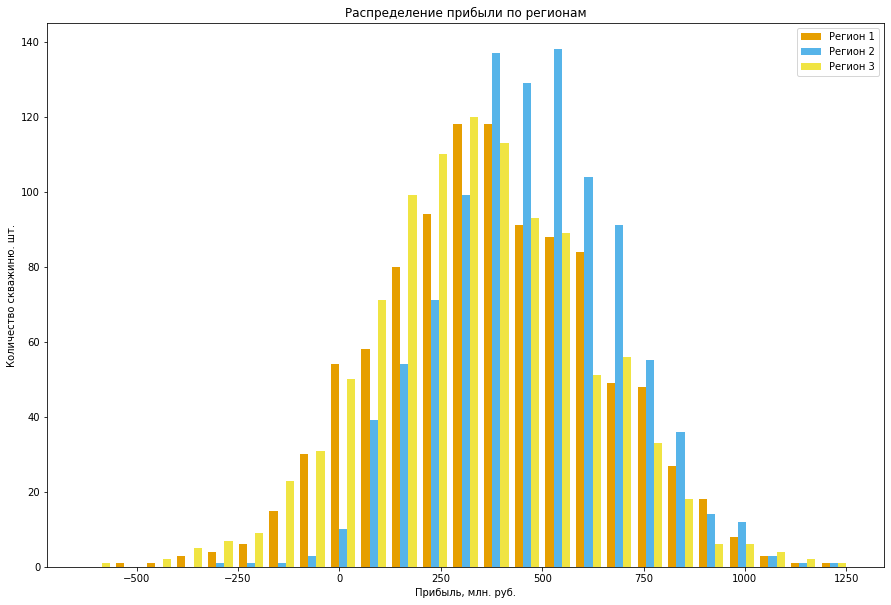

In [20]:
x1 = profit_distribution_1['Прибыль, млн. руб.']
x2 = profit_distribution_2['Прибыль, млн. руб.']
x3 = profit_distribution_3['Прибыль, млн. руб.']
plt.figure(figsize=(15, 10))

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ['Регион 1', 'Регион 2', 'Регион 3']

plt.hist([x1, x2, x3], bins = 25, normed=False,
         color = colors, label=names)


plt.legend()
plt.xlabel('Прибыль, млн. руб.')
plt.ylabel('Количество скважиню. шт.')
plt.title('Распределение прибыли по регионам')

#### Вывод:

Как видно из графика, прибыль всех трех регионов имеет распределние близкое к нормальному. Прибыль лежит в интервале от  500 млн рублей убытка до 1 250 млн. рублей прибыли. При этом отчетливо видно, что регион номер 2 смещен вправо. и его пики более высокие нежели у 1 и 3 регионов. 

### Добавим в сводную таблицу  среднюю прибыль, 95 % доверительный интервал и риск убытков для каждого региона: 


#### Добавим в таблицу среднюю предполагаемую прибыль по регионам: 

In [21]:
region_data['Средняя прибыль после bootstrap, млн. руб.'] = pd.Series(
    [profit_reg_mean_1, profit_reg_mean_2, profit_reg_mean_3]).astype('float').round(2)
region_data

,Регион добычи,"Средние реальные запасы сырья, тыс. барр.","Средние предсказанные запасы сырья,тыс. барр.",RMSE,"Разница среднего запаса региона и безубыточного запаса, тыс. барр.","Реальная прибыль, млн. руб.","Средняя прибыль после bootstrap, млн. руб."
0,1,92.59,92.08,37.58,92.59,3266.88,378.99
1,2,68.77,68.77,0.89,68.77,2353.01,475.70
2,3,95.09,94.75,39.96,95.09,2476.40,336.88


#### Добавим в таблицу 95 процентный доверительный интервал: 

In [22]:
region_data['95% дов. инт. от: , млн. руб.'] = pd.Series(
    [lower_1, lower_2, lower_3]).astype('float').round(2)

region_data['95% дов. инт. до: , млн. руб.'] = pd.Series(
    [upper_1, upper_2, upper_3]).astype('float').round(2)
region_data
                  

,Регион добычи,"Средние реальные запасы сырья, тыс. барр.","Средние предсказанные запасы сырья,тыс. барр.",RMSE,"Разница среднего запаса региона и безубыточного запаса, тыс. барр.","Реальная прибыль, млн. руб.","Средняя прибыль после bootstrap, млн. руб.","95% дов. инт. от: , млн. руб.","95% дов. инт. до: , млн. руб."
0,1,92.59,92.08,37.58,92.59,3266.88,378.99,-119.10,910.64
1,2,68.77,68.77,0.89,68.77,2353.01,475.70,71.02,890.76
2,3,95.09,94.75,39.96,95.09,2476.40,336.88,-178.68,845.00


#### Добавим в таблицу риск убытков для каждого региона: 

In [23]:
region_data['Риск убытков, %'] = pd.Series(
    [risk_1, risk_2, risk_3])
region_data

,Регион добычи,"Средние реальные запасы сырья, тыс. барр.","Средние предсказанные запасы сырья,тыс. барр.",RMSE,"Разница среднего запаса региона и безубыточного запаса, тыс. барр.","Реальная прибыль, млн. руб.","Средняя прибыль после bootstrap, млн. руб.","95% дов. инт. от: , млн. руб.","95% дов. инт. до: , млн. руб.","Риск убытков, %"
0,1,92.59,92.08,37.58,92.59,3266.88,378.99,-119.10,910.64,7.8
1,2,68.77,68.77,0.89,68.77,2353.01,475.70,71.02,890.76,1.0
2,3,95.09,94.75,39.96,95.09,2476.40,336.88,-178.68,845.00,9.2


## Вывод: 
Мы провели рассчеты прибыли с помощью техники бутстрап, рассчитали среднюю предсказанную и реальную прибыль, рассчитали 95% доверительный интервал. Риски получились минимальными во втором регионе(1 процента), риски в 1 и 3 регионах находятся на уровне 8 и 9 процентов соответственно. Исходя из полученных данных наиболее прибыльным регионом является регион №2 у него наибольшая средняя предсказанная прибыль, наибольший доверительный интервал, а также минимальные риски убытков.  

